In [2]:
import pandas as pd

df = pd.read_csv("OnlineNewsPopularity.csv")

# Dropping non predictive columns / tricky columns spelling
COLUMNS = df.shape[1]
df = df.drop(["url"," timedelta"], axis = 1) 

pd.set_option('display.max_columns', COLUMNS)
print("Dataset shape = {}".format(df.shape))
df.sample(10)

Dataset shape = (39644, 59)


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
5049,9.0,583.0,0.587361,1.0,0.770588,19.0,4.0,10.0,0.0,4.418525,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,900.0,401.000000,4400.0,617900.0,375060.000000,2571.400000,4620.785398,3494.299835,1000.0,2800.0,1900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.244202,0.040000,0.635797,0.040000,0.501137,0.047715,0.020583,0.017153,0.545455,0.454545,0.312500,0.050000,0.6,-0.262083,-0.5000,-0.033333,1.000000,-0.500000,0.500000,0.500000,6000
27141,10.0,737.0,0.461644,1.0,0.577731,12.0,0.0,1.0,0.0,5.434193,7.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1500.0,419.666667,0.0,843300.0,155700.000000,0.000000,6565.615385,2907.482342,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172617,0.028577,0.599409,0.170807,0.028589,0.452918,0.133913,0.055631,0.014925,0.788462,0.211538,0.312954,0.033333,1.0,-0.265909,-1.0000,-0.125000,0.166667,0.000000,0.333333,0.000000,756
1516,8.0,811.0,0.431250,1.0,0.577825,22.0,4.0,8.0,0.0,4.729963,10.0,1.0,0.0,0.0,0.0,0.0,0.0,217.0,676.0,411.888889,0.0,69100.0,22400.000000,0.000000,2763.522059,2136.640425,2700.0,2700.0,2700.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.020038,0.020001,0.020002,0.020057,0.919901,0.439403,0.117170,0.041924,0.017263,0.708333,0.291667,0.317755,0.033333,0.8,-0.208929,-0.5000,-0.066667,1.000000,0.500000,0.500000,0.500000,3400
23780,12.0,489.0,0.491667,1.0,0.601974,7.0,1.0,7.0,0.0,4.437628,10.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1200.0,389.900000,1300.0,843300.0,191510.000000,857.000000,6759.083333,2857.153726,9800.0,9800.0,9800.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.020001,0.020001,0.710177,0.229820,0.020001,0.319047,0.038415,0.016360,0.008180,0.666667,0.333333,0.198295,0.100000,0.4,-0.204514,-0.3125,-0.100000,0.000000,0.000000,0.500000,0.000000,1000
19808,10.0,1396.0,0.442963,1.0,0.606977,29.0,5.0,12.0,0.0,4.773639,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,730.0,268.333333,0.0,843300.0,191357.142857,0.000000,4717.538462,3130.675406,753.0,21000.0,14251.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.885663,0.028572,0.028622,0.028572,0.442849,0.097167,0.032235,0.019341,0.625000,0.375000,0.453771,0.050000,1.0,-0.343981,-1.0000,-0.100000,0.000000,0.000000,0.500000,0.000000,1300
26579,7.0,1351.0,0.458302,1.0,0.599338,10.0,2.0,4.0,13.0,5.110289,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,781.0,329.428571,7000.0,843300.0,250100.000000,2681.500000,25797.900000,6665.891573,929.0,2300.0,1614.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.028572,0.029220,0.028572,0.885064,0.028572,0.518055,0.297106,0.044412,0.015544,0.740741,0.259259,0.643692,0.136364,1.0,-0.485544,-1.0000,-0.050000,0.550000,0.350000,0.050000,0.350000,3300
19394,11.0,225.0,0.565022,1.0,0.597315,11.0,2.0,11.0,2.0,4.844444,10.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,832.0,302.900000,832.0,843300.0,264443.200000,832.000000,16349.764706,5847.914599,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.020001,0.020017,0.020000,0.919975,0.020007,0.628530,-0.093069,0.017778,0.044444,0.285714,0.714286,0.587500,0.250000,1.0,-0.397004,-1.0000,-0.071429,0.000000,0.000000,0.500000,0.000000,2700
1021,9.0,55

In [2]:
df.dtypes.value_counts()

float64    58
int64       1
dtype: int64

In [7]:
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [3]:
num_cols = [' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',      
       ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares']

# The data is already one-hot encoded - This is categorical data
non_num_cols = [' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend' ]

### Numeric Features

In [4]:
df[num_cols].describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,7.000000,-1.000000,660.000000,235.500000,1400.000000,843300.000000,244572.222223,1023.635611,4355.688836,2870.074878,1200.000000,2800.000000,2200.000000,0.033387,0.033345,0.040004,0.040001,0.040727,0.453457,0.119117,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,9.000000,4.000000,1000.000000,357.000000,7900.000000,843300.000000,330980.000000,2056.781032,6019.953968,3600.229564,2600.000000,8000.000000,5200.000000,0.240958,0.150831,0.334218,0.375763,0.399986,0.508333,0.177832,0.050279,0.021739,0.800000,0.384615,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.15

### Distribution of the numeric features

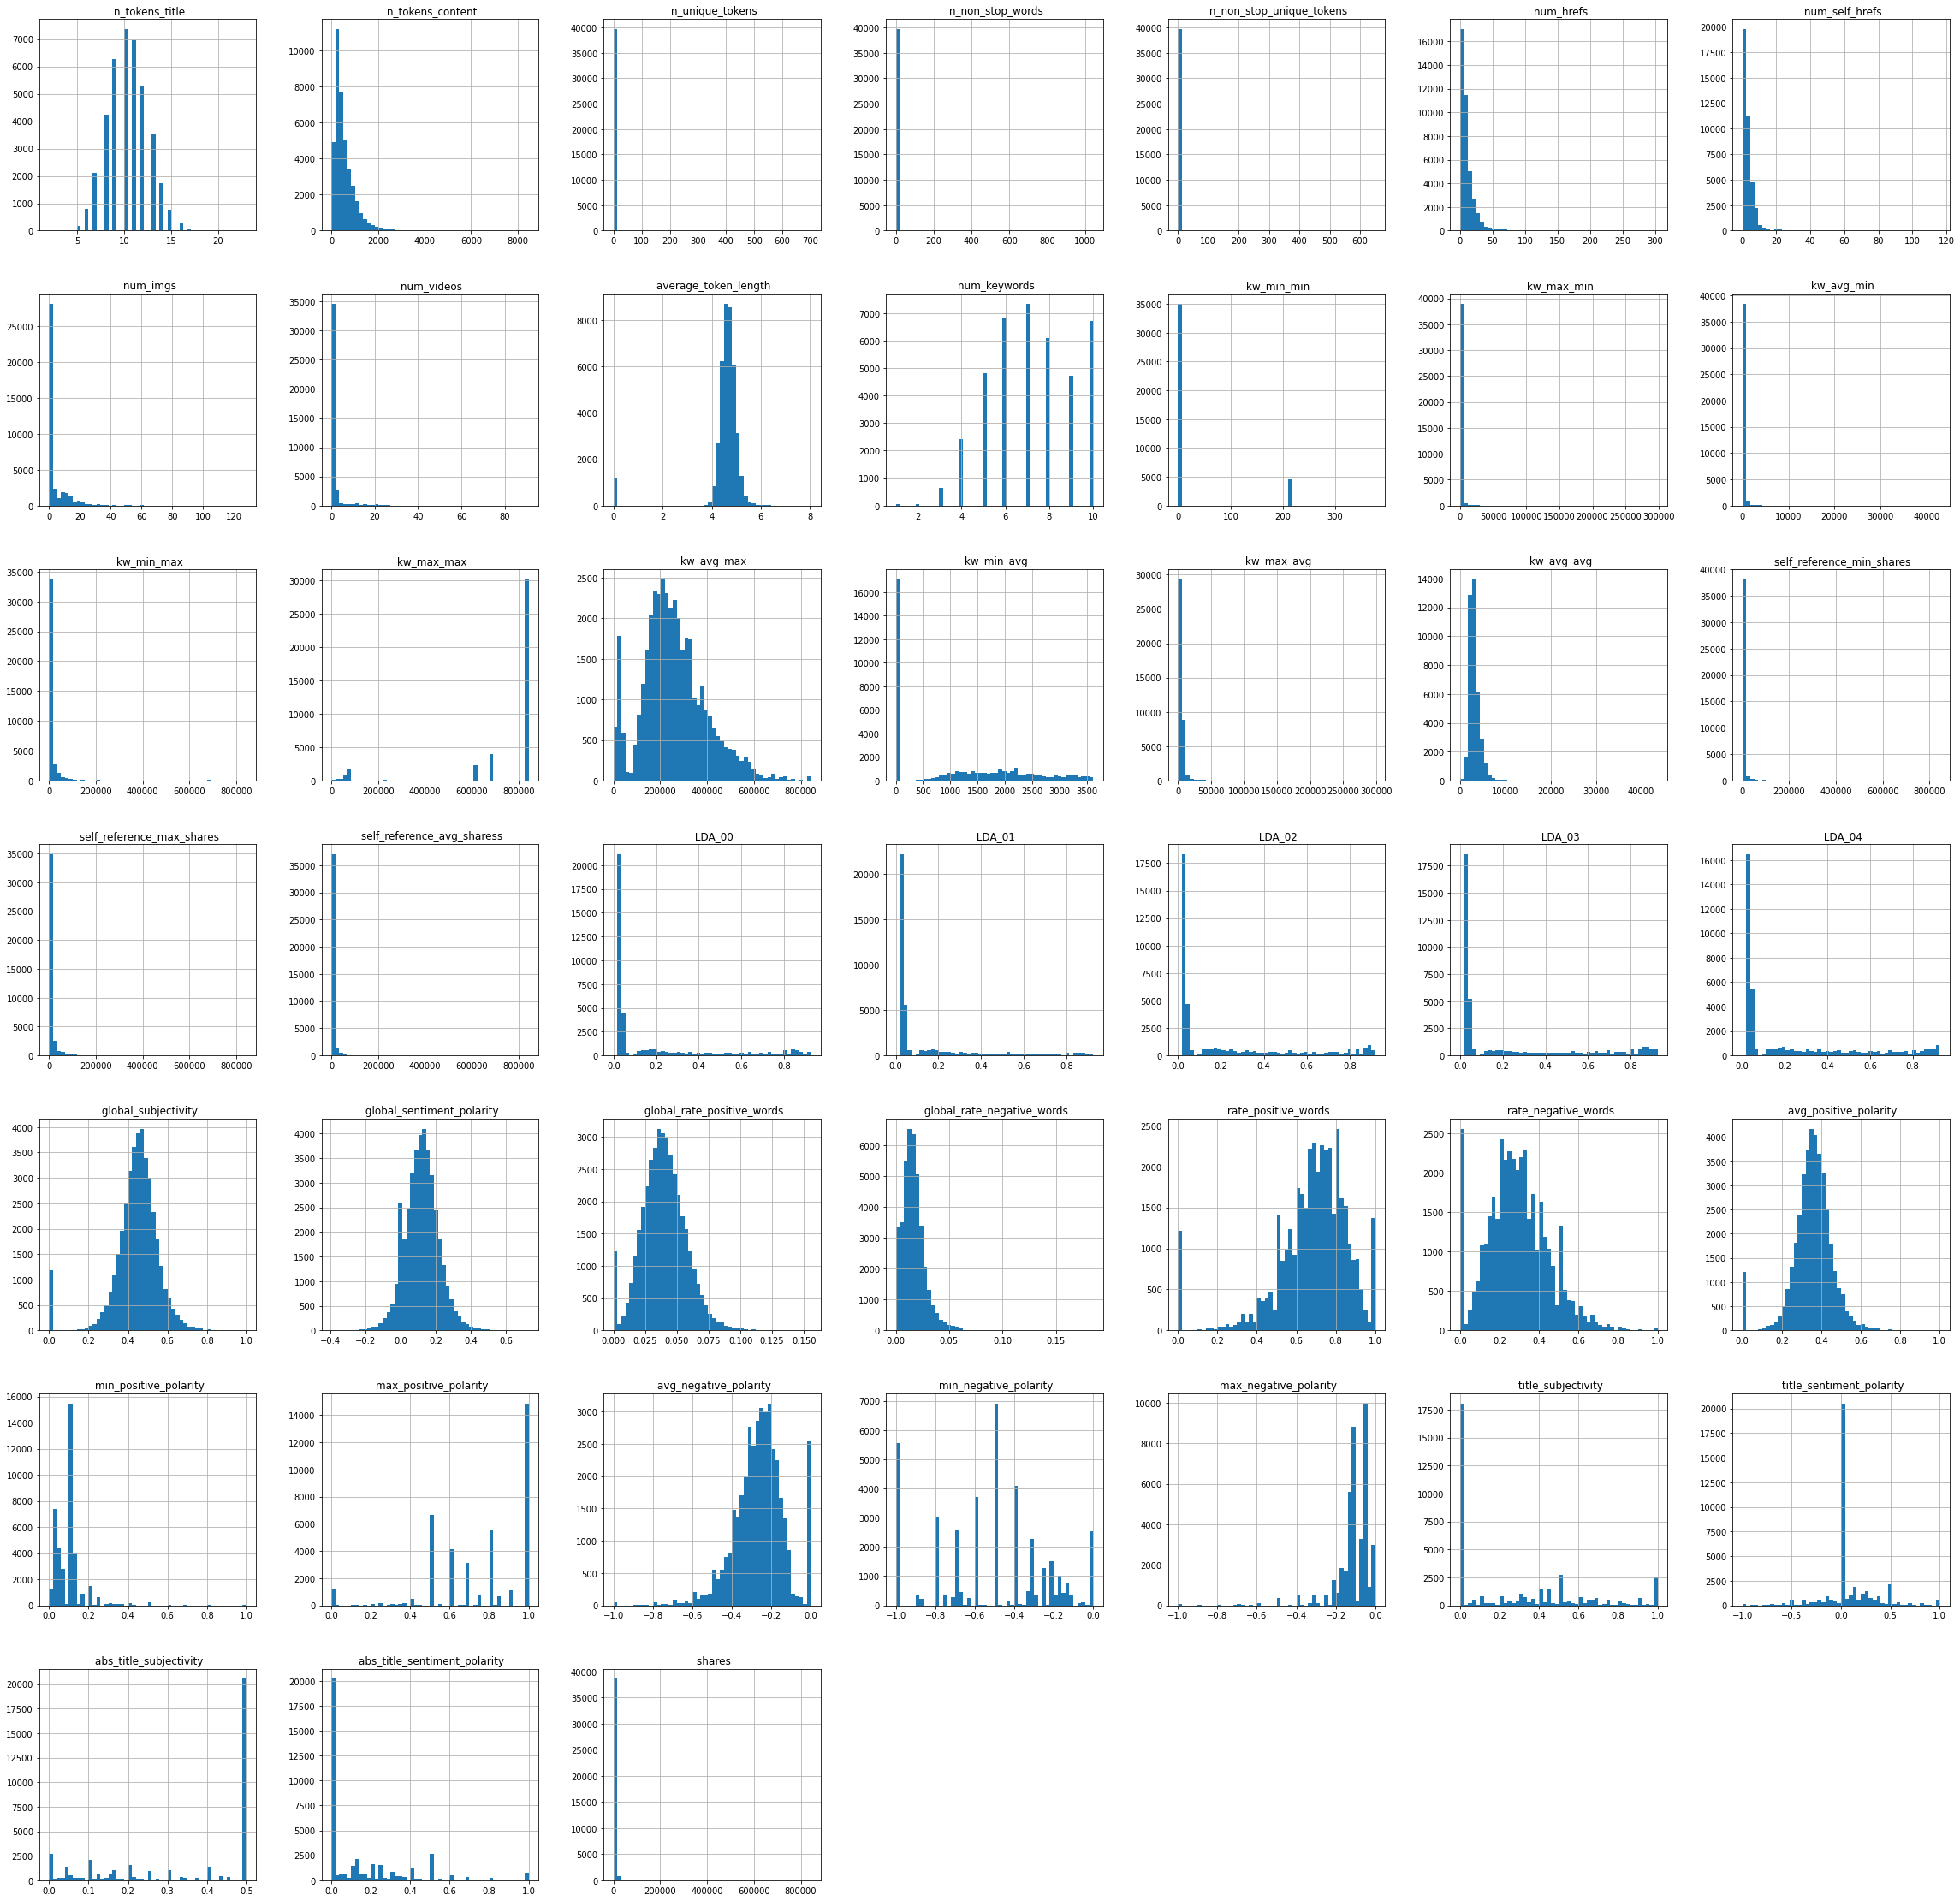

In [16]:
import matplotlib.pyplot as plt
df[num_cols].hist(figsize=(40,40), xrot = 0, bins = 50)
plt.show()

## Observations from the graphs

comman used "df[num_cols].hist(figsize=(40,40), xrot = 0, bins = 50)"

2. n_tokens_title: Gaussian distribution form / No presence of outliers 
3. n_tokens_content: Gaussian distribution form / Outliers present for values greater than '3000'
4. n_unique_tokens: Outliers present for values greater than '50'
5. n_non_stop_words: Outliers present for values greater than '100' 
6. n_non_stop_unique_tokens: Outliers present for values greater than '50' 
7. num_hrefs: Exponential Distribution form / Outliers present for values greater than '100'
8. num_self_hrefs: Exponential Distribution form / Outliers present for values greater than '30'

9. num_imgs: Exponential Distribution form / Outliers present for values greater than '80' 
10. num_videos: Exponential Distribution form / Outliers present for values greater than '40'
11. average_token_length: Gaussian distribution form / Outliers present for values equal to '0'
12. num_keywords: 
19. kw_min_min: Probably outliers at values greater than '200' 
20. kw_max_min: Outliers present for values greater than '50 000' 
21. kw_avg_min: Outliers present for values greater than '500'

22. kw_min_max: Exponential Distribution form / Probably outliers present for values greater than '30 000'
23. kw_max_max:  
24. kw_avg_max:  
25. kw_min_avg:  
26. kw_max_avg: Exponential Distribution form / Outliers present for values greater than '50 000' 
27. kw_avg_avg: Gaussian distribution form / Outliers present for values greater than '20 000'
28. self_reference_min_shares: Exponential Distribution form / Outliers present for values greater than '20 000'

29. self_reference_max_shares: Exponential Distribution form / Outliers present for values greater than '15 000'  
30. self_reference_avg_sharess: Exponential Distribution form / Outliers present for values greater than '10 000' 
39. LDA_00:  
40. LDA_01:  
41. LDA_02:  
42. LDA_03:  
43. LDA_04:  

44. global_subjectivity: Gaussian distribution form
45. global_sentiment_polarity:  Gaussian distribution form
46. global_rate_positive_words:  Gaussian distribution form
47. global_rate_negative_words:  Gaussian distribution form
48. rate_positive_words:  Gaussian distribution form 
49. rate_negative_words:  Gaussian distribution form 
50. avg_positive_polarity:  Gaussian distribution form 

51. min_positive_polarity:  
52. max_positive_polarity:  
53. avg_negative_polarity:  Gaussian distribution form 
54. min_negative_polarity: 
55. max_negative_polarity: 
56. title_subjectivity:  
57. title_sentiment_polarity: 

58. abs_title_subjectivity: '0.5' Dominant
59. abs_title_sentiment_polarity: '0' dominant 

60. shares: Exponential distribution / Outliers present for values greater than '100 000'

### A better perspective of the outliers can be obtained by box plots

### Some features have been plot in log scale mode

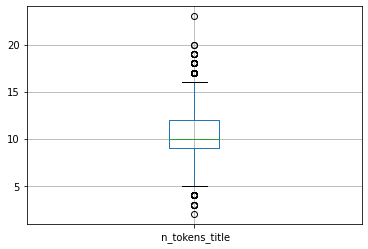

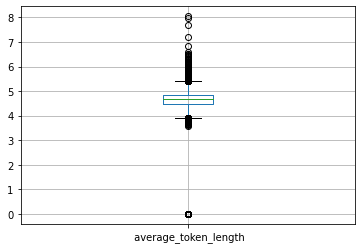

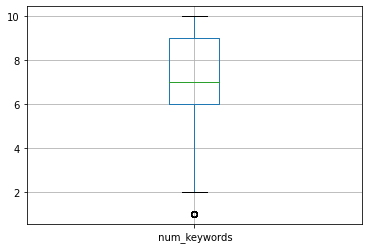

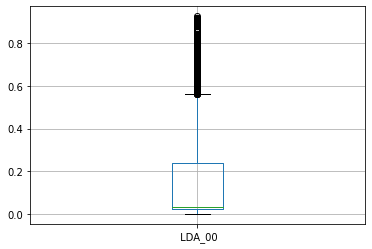

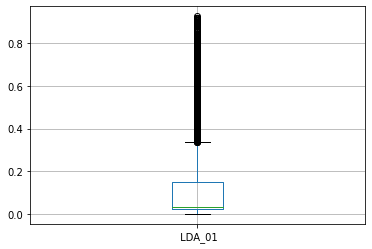

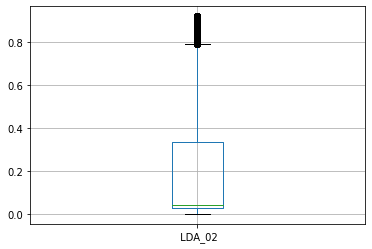

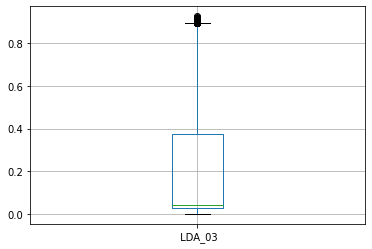

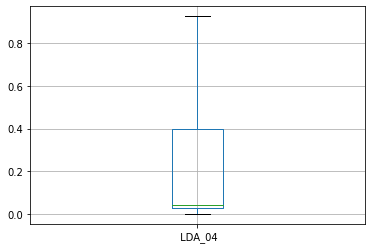

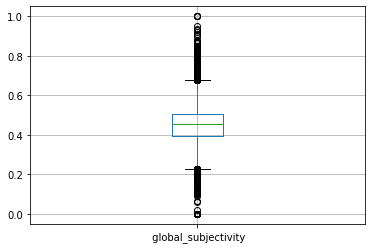

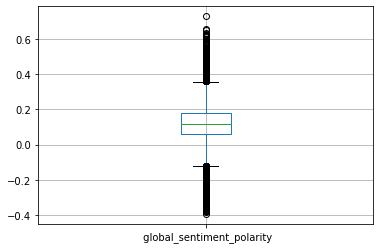

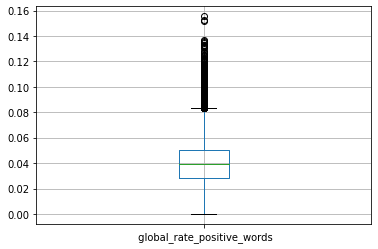

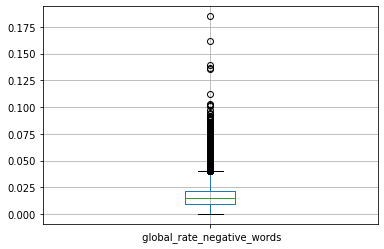

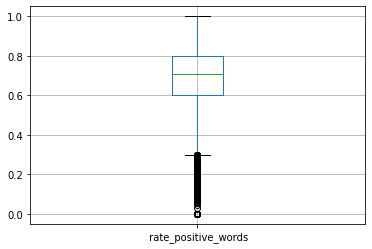

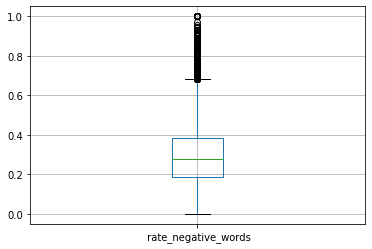

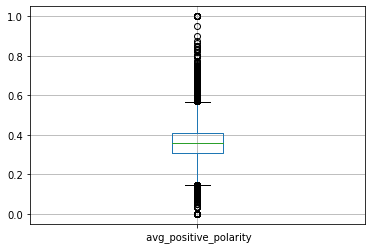

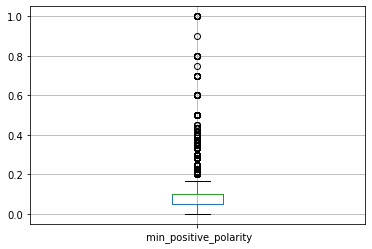

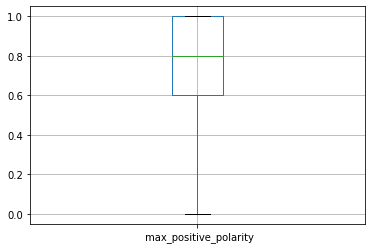

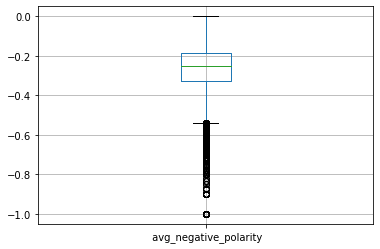

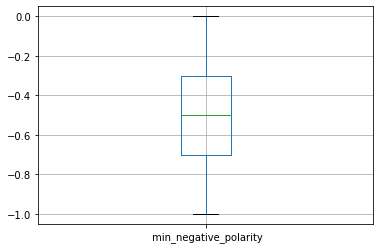

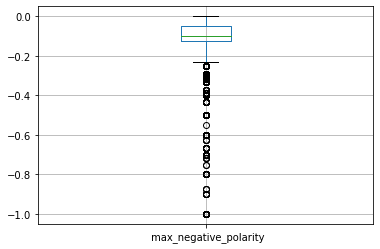

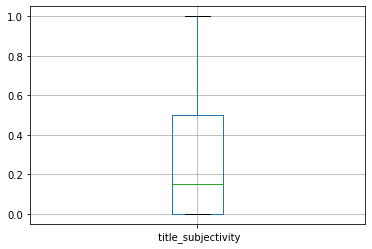

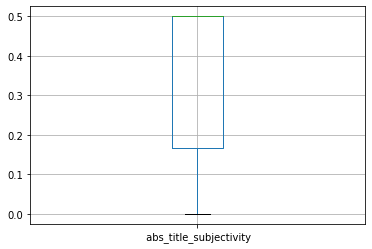

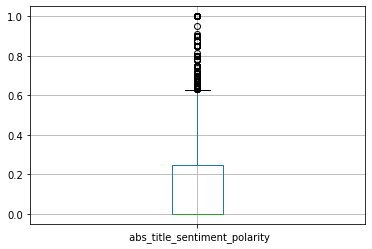

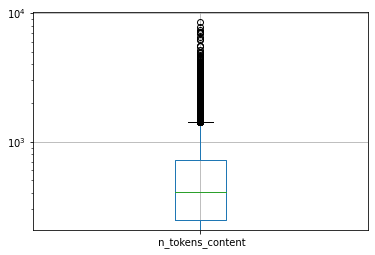

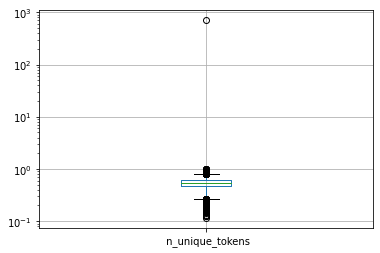

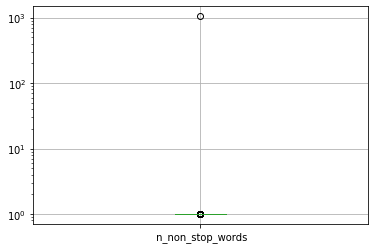

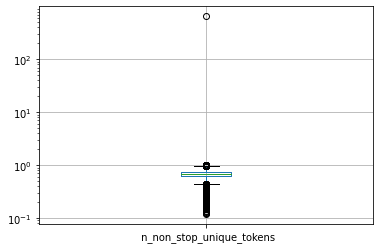

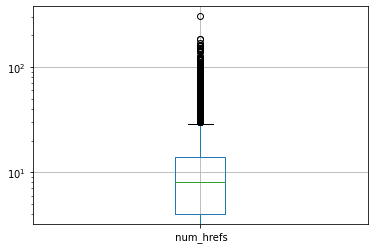

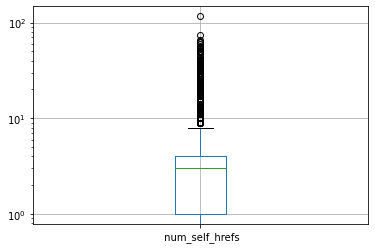

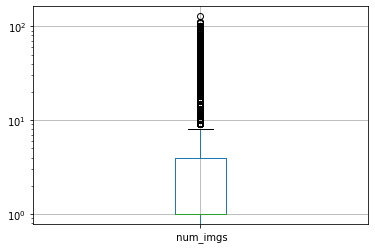

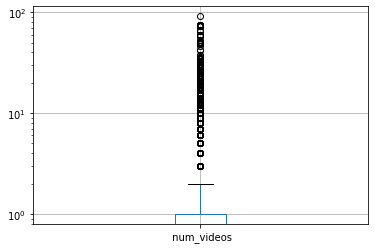

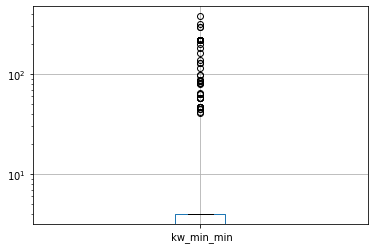

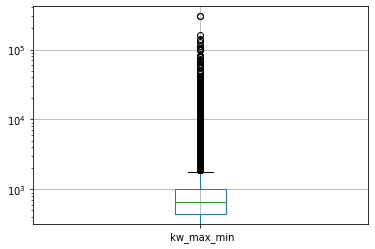

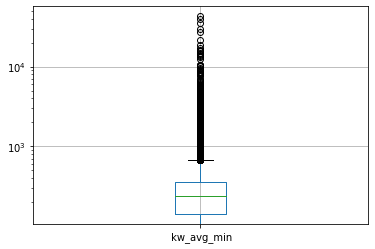

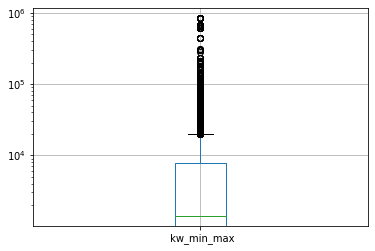

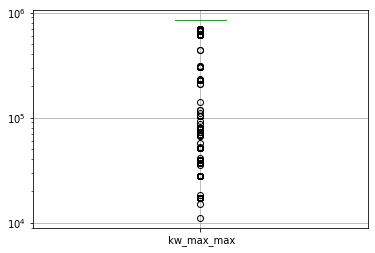

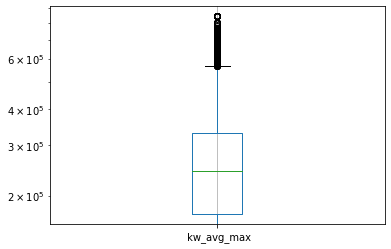

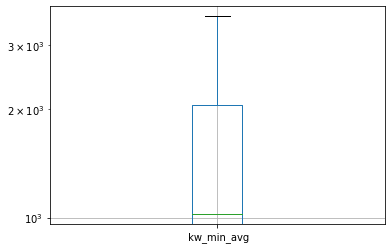

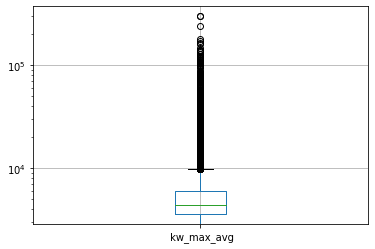

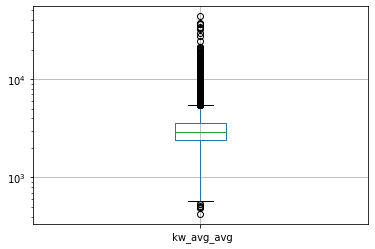

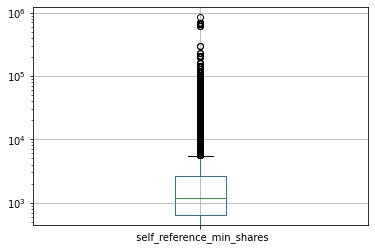

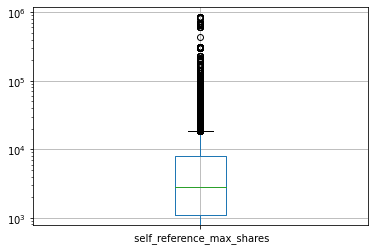

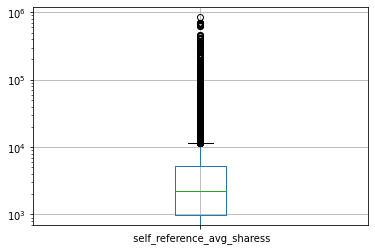

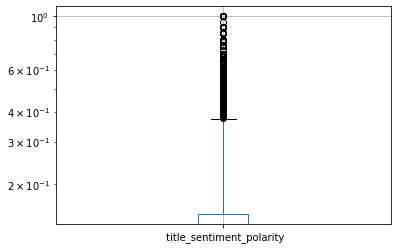

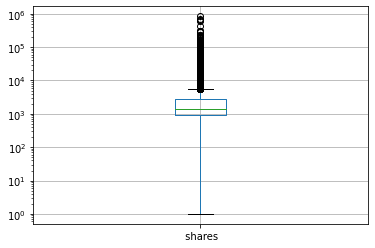

In [143]:
cols_linear = [' n_tokens_title', ' average_token_length',
       ' num_keywords', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ]

cols_log = [' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', ' title_sentiment_polarity', ' shares' ]

for col in cols_linear:
    df.boxplot(column = col)
    plt.show()

for col in cols_log:
    bp = df.boxplot(column = col)
    bp.set_yscale("log")
    plt.show()

### Categorical Features 

In [50]:
data_channel = [' data_channel_is_lifestyle',' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world']
week_day = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday']

df[' data_channel_type']   = df[data_channel].idxmax(axis = 1)
df[' weekday_is']          = df[week_day].idxmax(axis = 1)

In [51]:
df.describe(include = 'object')

,data_channel_type,weekday_is
count,39644,39644
unique,6,7
top,data_channel_is_world,weekday_is_wednesday
freq,8427,7435


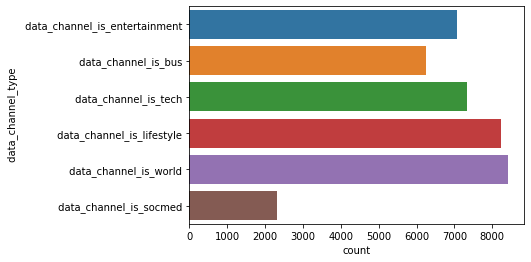

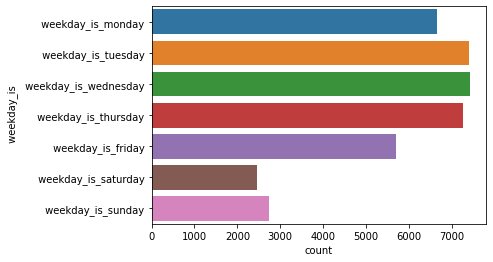

In [56]:
import seaborn as sns

for column in df.select_dtypes(include='object'):
    sns.countplot(y=column, data=df)
    plt.show()

### Grouping and Segmentation 

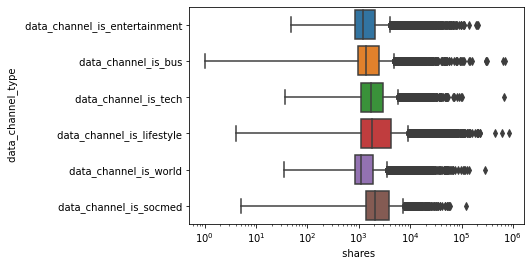

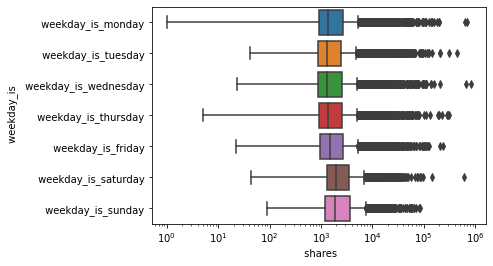

In [95]:
output = ' shares'

for column in df.select_dtypes(include='object'):
    bp = sns.boxplot(y=column, x=output, data=df, showfliers=True)
    bp.set_xscale('log')
    plt.show()

### Relationships between numeric features and other numeric features - HEATMAP of the CORRELATIONS

<AxesSubplot:>

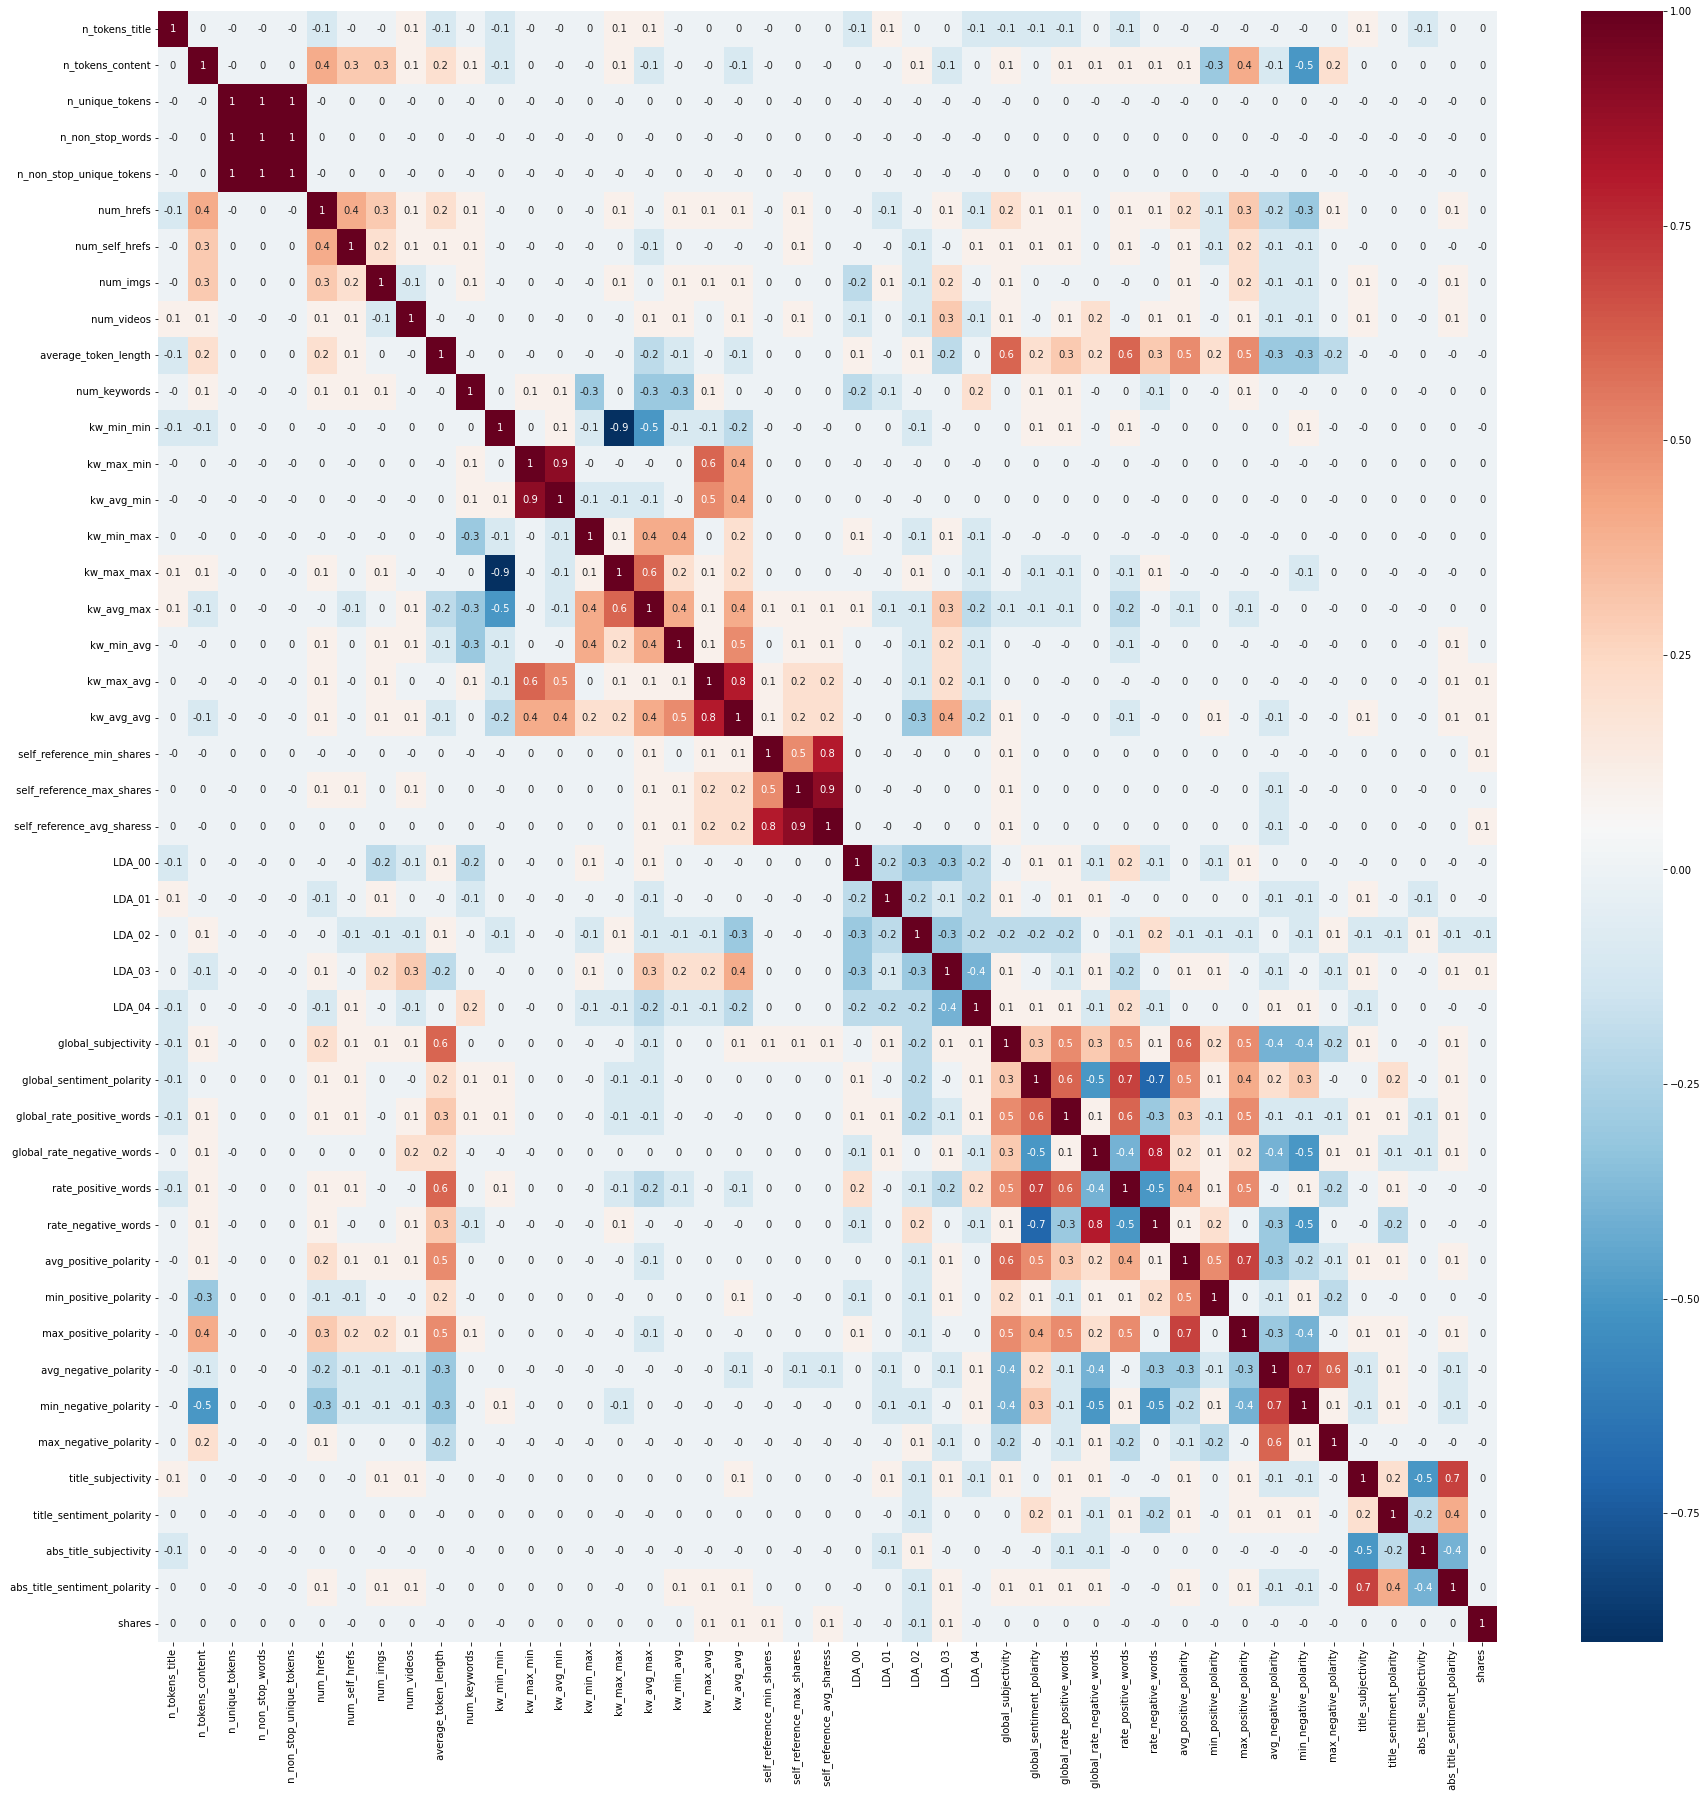

In [102]:
data = df[num_cols]
corrs = data.corr().round(decimals = 1)

fig, ax = plt.subplots(figsize = (30, 30))

sns.heatmap(corrs, cmap='RdBu_r',annot=True, ax=ax)

### Features with correlation = 1 / We could sum these 3 columns 

<AxesSubplot:xlabel=' n_non_stop_unique_tokens', ylabel=' n_unique_tokens'>

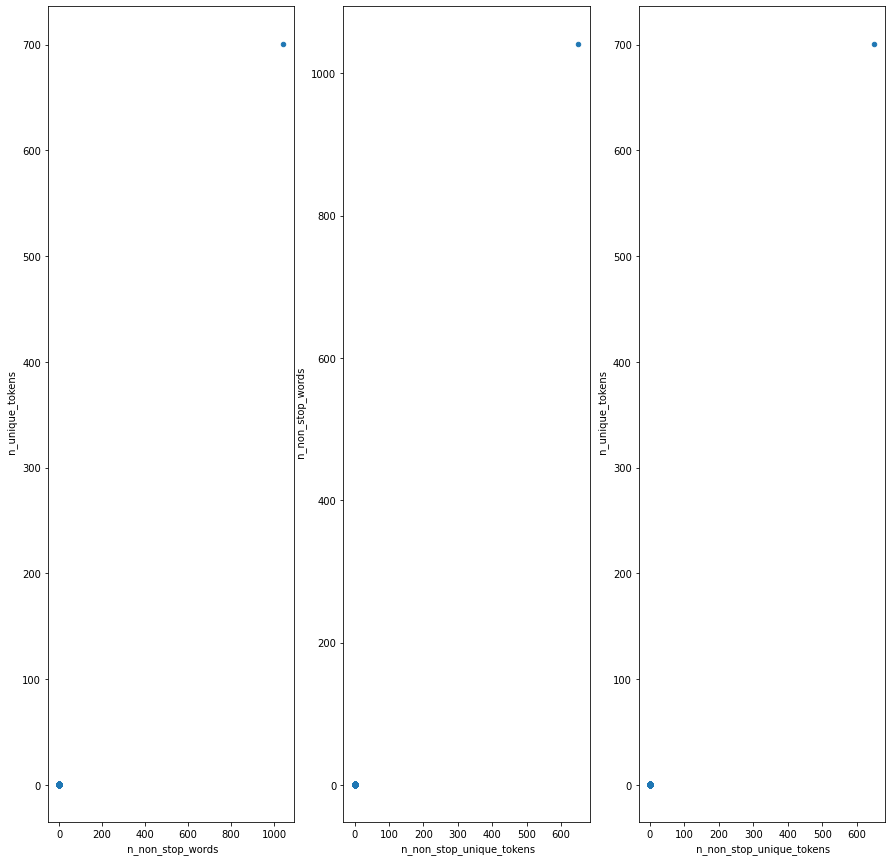

In [125]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize =(15,15)) # Create the figure and axes object
df[[" n_non_stop_words"," n_unique_tokens"]].plot.scatter(x = " n_non_stop_words", y = " n_unique_tokens", ax = ax[0]) # corr = 1.0

df[[" n_non_stop_unique_tokens"," n_non_stop_words"]].plot.scatter(x = " n_non_stop_unique_tokens", y = " n_non_stop_words", ax = ax[1]) # corr = 1.0

df[[" n_non_stop_unique_tokens"," n_unique_tokens"]].plot.scatter(x = " n_non_stop_unique_tokens", y = " n_unique_tokens", ax = ax[2]) # corr = 1.0

### Features with high correlation / We could sum only " kw_avg_min" AND " kw_max_min"

<AxesSubplot:xlabel=' kw_avg_max', ylabel=' kw_max_max'>

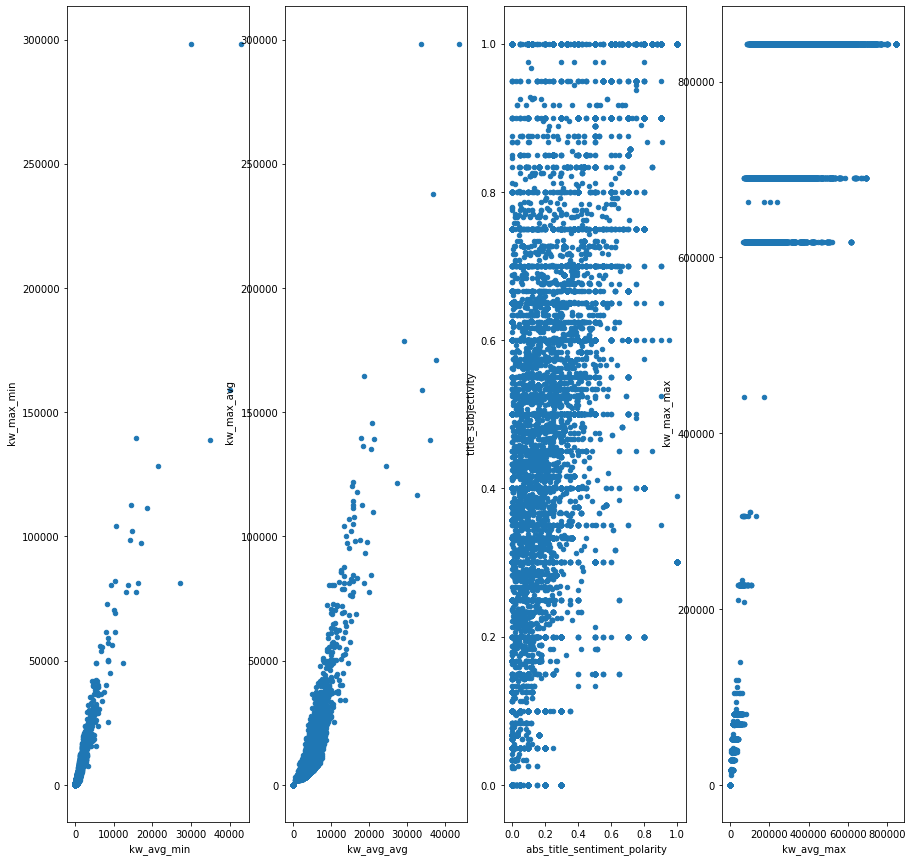

In [129]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15,15))

df[[" kw_avg_min"," kw_max_min"]].plot.scatter(x = " kw_avg_min", y = " kw_max_min", ax = ax[0]) ## corr = 0.9
 
df[[" kw_avg_avg"," kw_max_avg"]].plot.scatter(x = " kw_avg_avg", y = " kw_max_avg", ax = ax[1]) ## corr = 0.8

df[[' abs_title_sentiment_polarity', ' title_subjectivity']].plot.scatter(x = " abs_title_sentiment_polarity", y = " title_subjectivity", ax = ax[2]) ## corr = 0.7

df[[" kw_avg_max"," kw_max_max"]].plot.scatter(x = " kw_avg_max", y = " kw_max_max", ax = ax[3]) ## corr = 0.6




### Features with negative correlation

<AxesSubplot:xlabel=' kw_max_max', ylabel=' kw_min_min'>

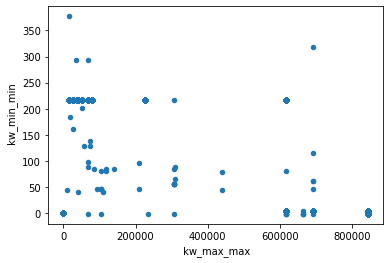

In [203]:
df[[" kw_max_max"," kw_min_min"]].plot.scatter(x = " kw_max_max", y = " kw_min_min") ## corr = - 0.9

## Using all the information aboved, we can preprocess the data as ...

In [50]:
import pandas as pd 
df = pd.read_csv("OnlineNewsPopularity.csv")
df = df.drop(["url"," timedelta"], axis = 1) 

df2 = df.copy()

# Create a new feature by summing up 3 columns
df2['new_feat'] = df[" n_non_stop_words"] + df[" n_unique_tokens"] + df[" n_non_stop_unique_tokens"]
df2.drop([" n_non_stop_words"," n_unique_tokens"," n_non_stop_unique_tokens"," n_unique_tokens"], axis = 1, inplace = True)

# List of numerical features 
num_col = ['new_feat',' n_tokens_title', ' n_tokens_content', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',      
       ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares']

# Replacing ouliers by the minimum or maximum value
for col in num_col:
    min, max = df2[col].quantile(q = [0.1, 0.95])

    conditions = [(df2[col] >= max), (df2[col] <= min)]
    values = [max, min]

    for cond,val in zip(conditions,values):
        df2.loc[cond,col] = val

df2.sample(10)

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,new_feat
20979,12.0,274.0,8.0,3.0,2.0,0.0,4.594891,7.0,0.0,0.0,...,1.0,-0.375000,-0.50,-0.125000,0.000000,0.000000,0.500000,0.000000,2900,2.342424
23890,14.0,782.0,18.0,4.0,15.0,2.0,4.473146,6.0,0.0,1.0,...,0.9,-0.408333,-1.00,-0.125000,0.327778,0.200000,0.172222,0.200000,827,2.074985
39597,9.0,1016.0,7.0,5.0,3.0,1.0,4.791339,8.0,0.0,0.0,...,0.8,-0.338624,-0.70,-0.100000,0.000000,0.000000,0.500000,0.000000,2100,1.990495
31659,10.0,152.0,6.0,4.0,0.0,1.0,4.302621,10.0,0.0,0.0,...,0.5,-0.183333,-0.20,-0.166667,0.500000,0.500000,0.045455,0.500000,1100,2.539683
6807,11.0,222.0,4.0,2.0,0.0,0.0,4.576577,6.0,0.0,0.0,...,0.7,-0.250000,-0.25,-0.187500,0.675000,0.418182,0.175000,0.418182,3300,2.303225
16732,8.0,1106.0,9.0,3.0,1.0,0.0,4.869801,6.0,0.0,0.0,...,1.0,-0.329167,-0.80,-0.050000,0.000000,0.000000,0.500000,0.000000,2800,2.034137
28091,8.0,1407.0,28.0,5.0,2.0,4.0,4.450296,10.0,0.0,0.0,...,1.0,-0.307937,-0.50,-0.125000,1.000000,0.500000,0.500000,0.500000,2300,2.013645
24771,11.0,573.0,24.0,2.0,12.0,0.0,4.574171,8.0,1.0,0.0,...,1.0,-0.291146,-0.60,-0.125000,0.000000,0.000000,0.500000,0.000000,5900,2.200178
22905,8.0,296.0,2.0,2.0,1.0,0.0,4.317568,5.0,0.0,0.0,...,0.6,-0.318519,-0.50,-0.155556,1.000000,0.000000,0.500000,0.000000,1900,2.146225
16087,8.0,209.0,15.0,3.0,12.0,0.0,5.000000,10.0,0.0,0.0,...,0.9,-0.408333,-0.60,-0.187500,0.950000,-0.133333,0.450000,0.550000,10800,2.150521


### Box plot shows that the amount of outliers is reduced

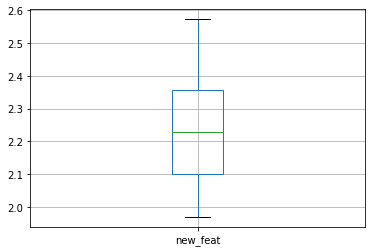

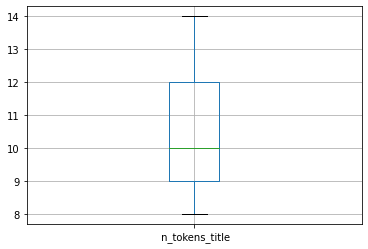

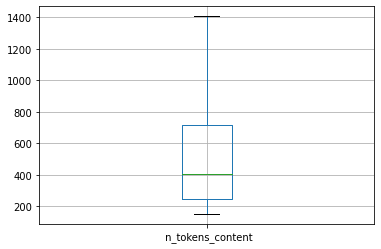

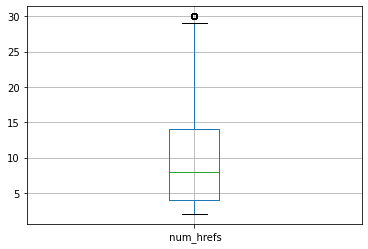

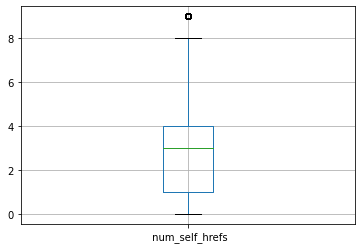

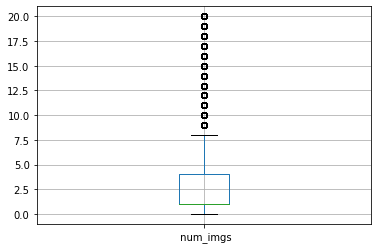

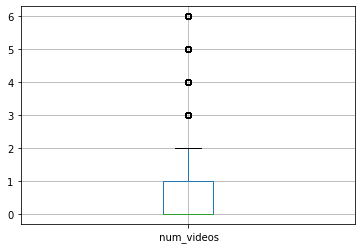

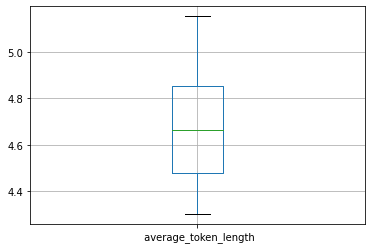

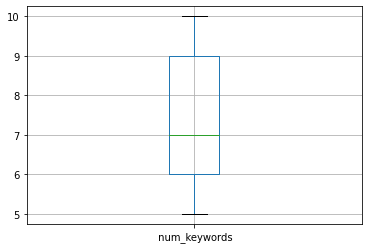

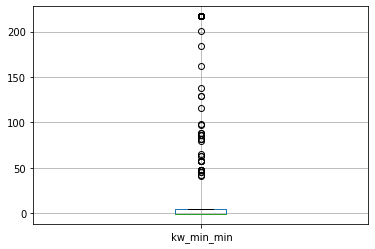

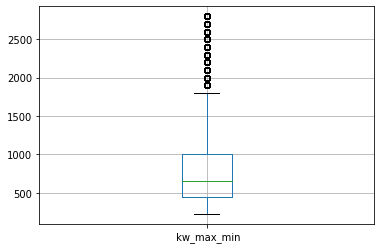

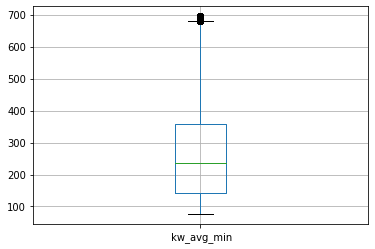

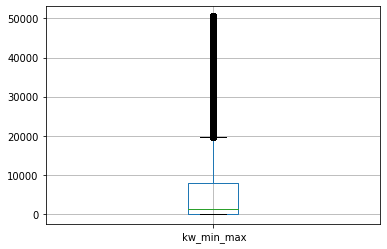

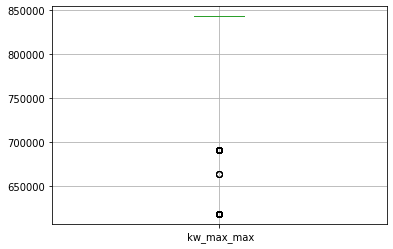

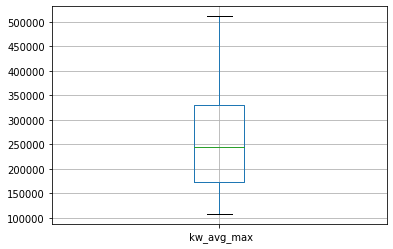

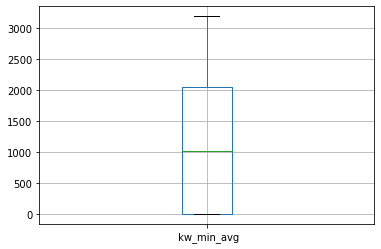

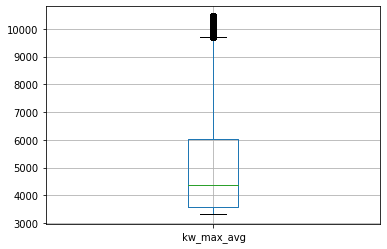

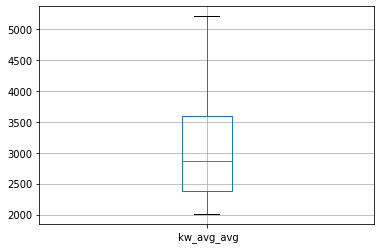

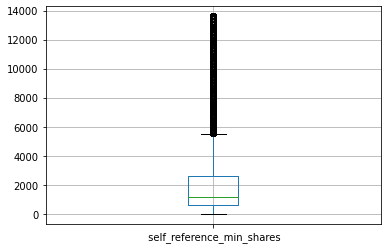

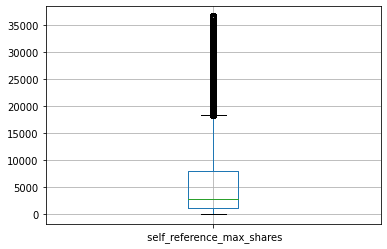

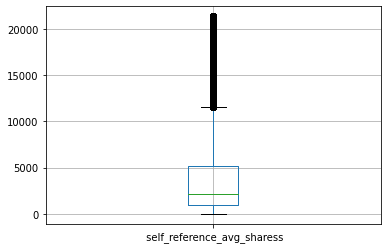

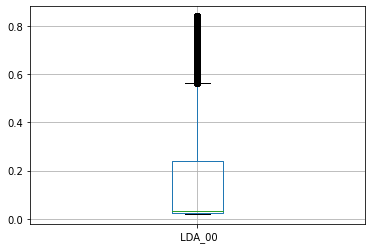

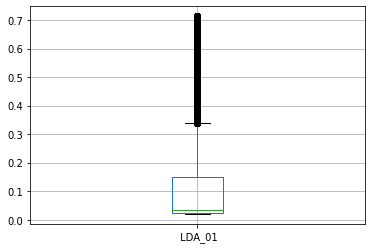

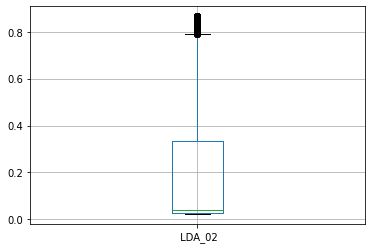

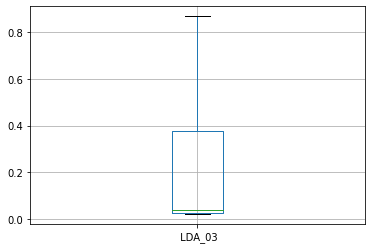

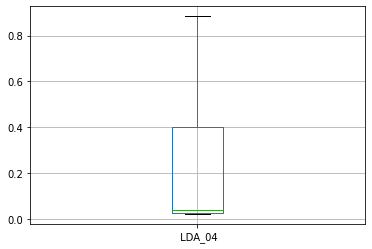

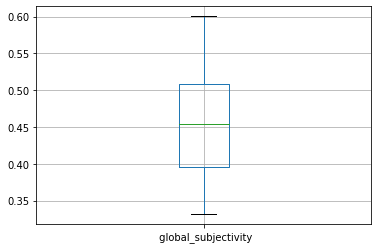

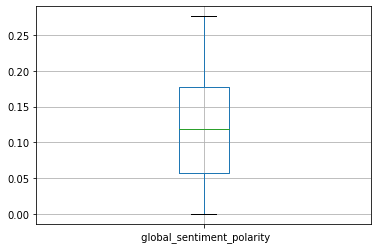

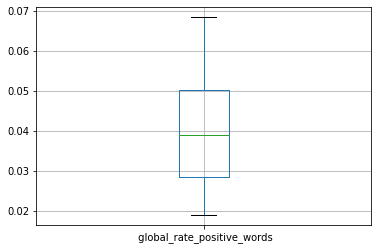

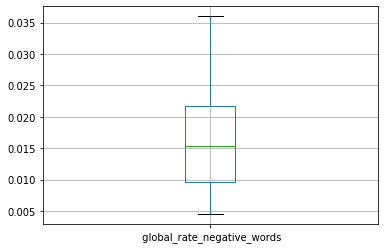

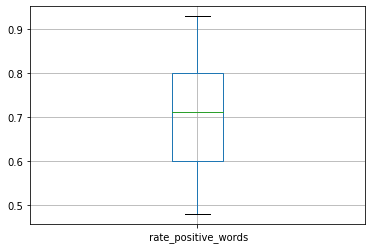

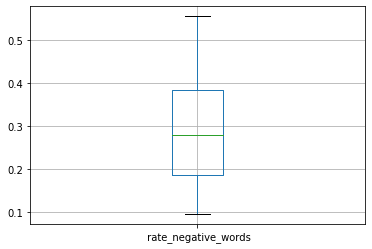

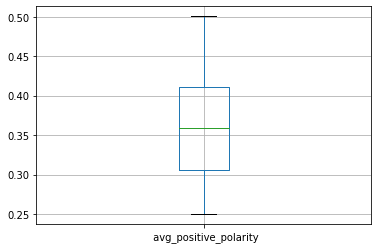

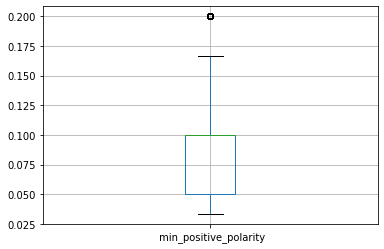

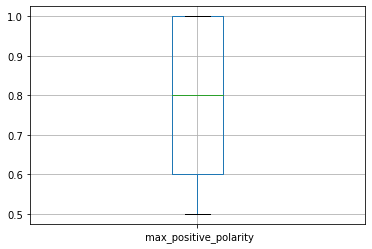

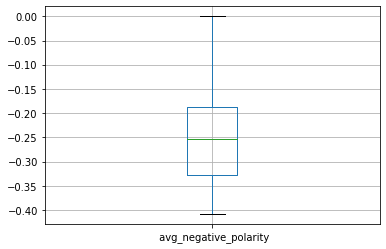

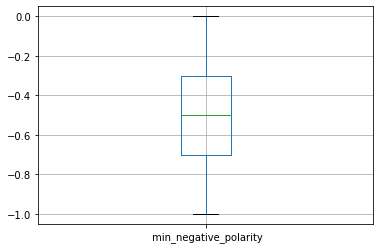

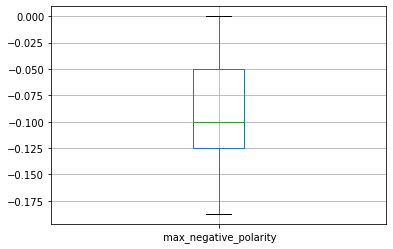

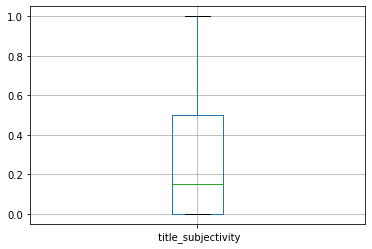

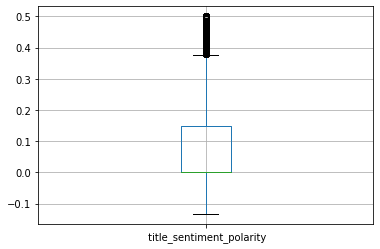

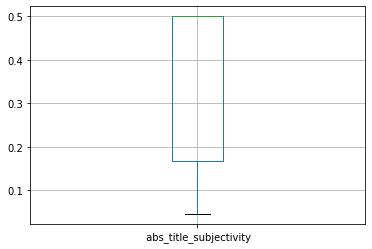

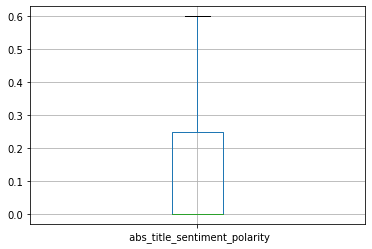

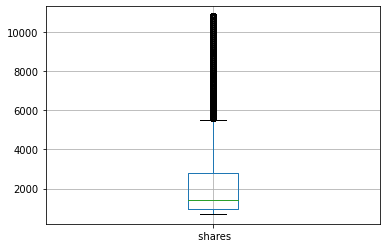

In [51]:
import matplotlib.pyplot as plt  

for col in num_col:
    df2.boxplot(column = col)
    plt.show()

### Histogram shows less outliers

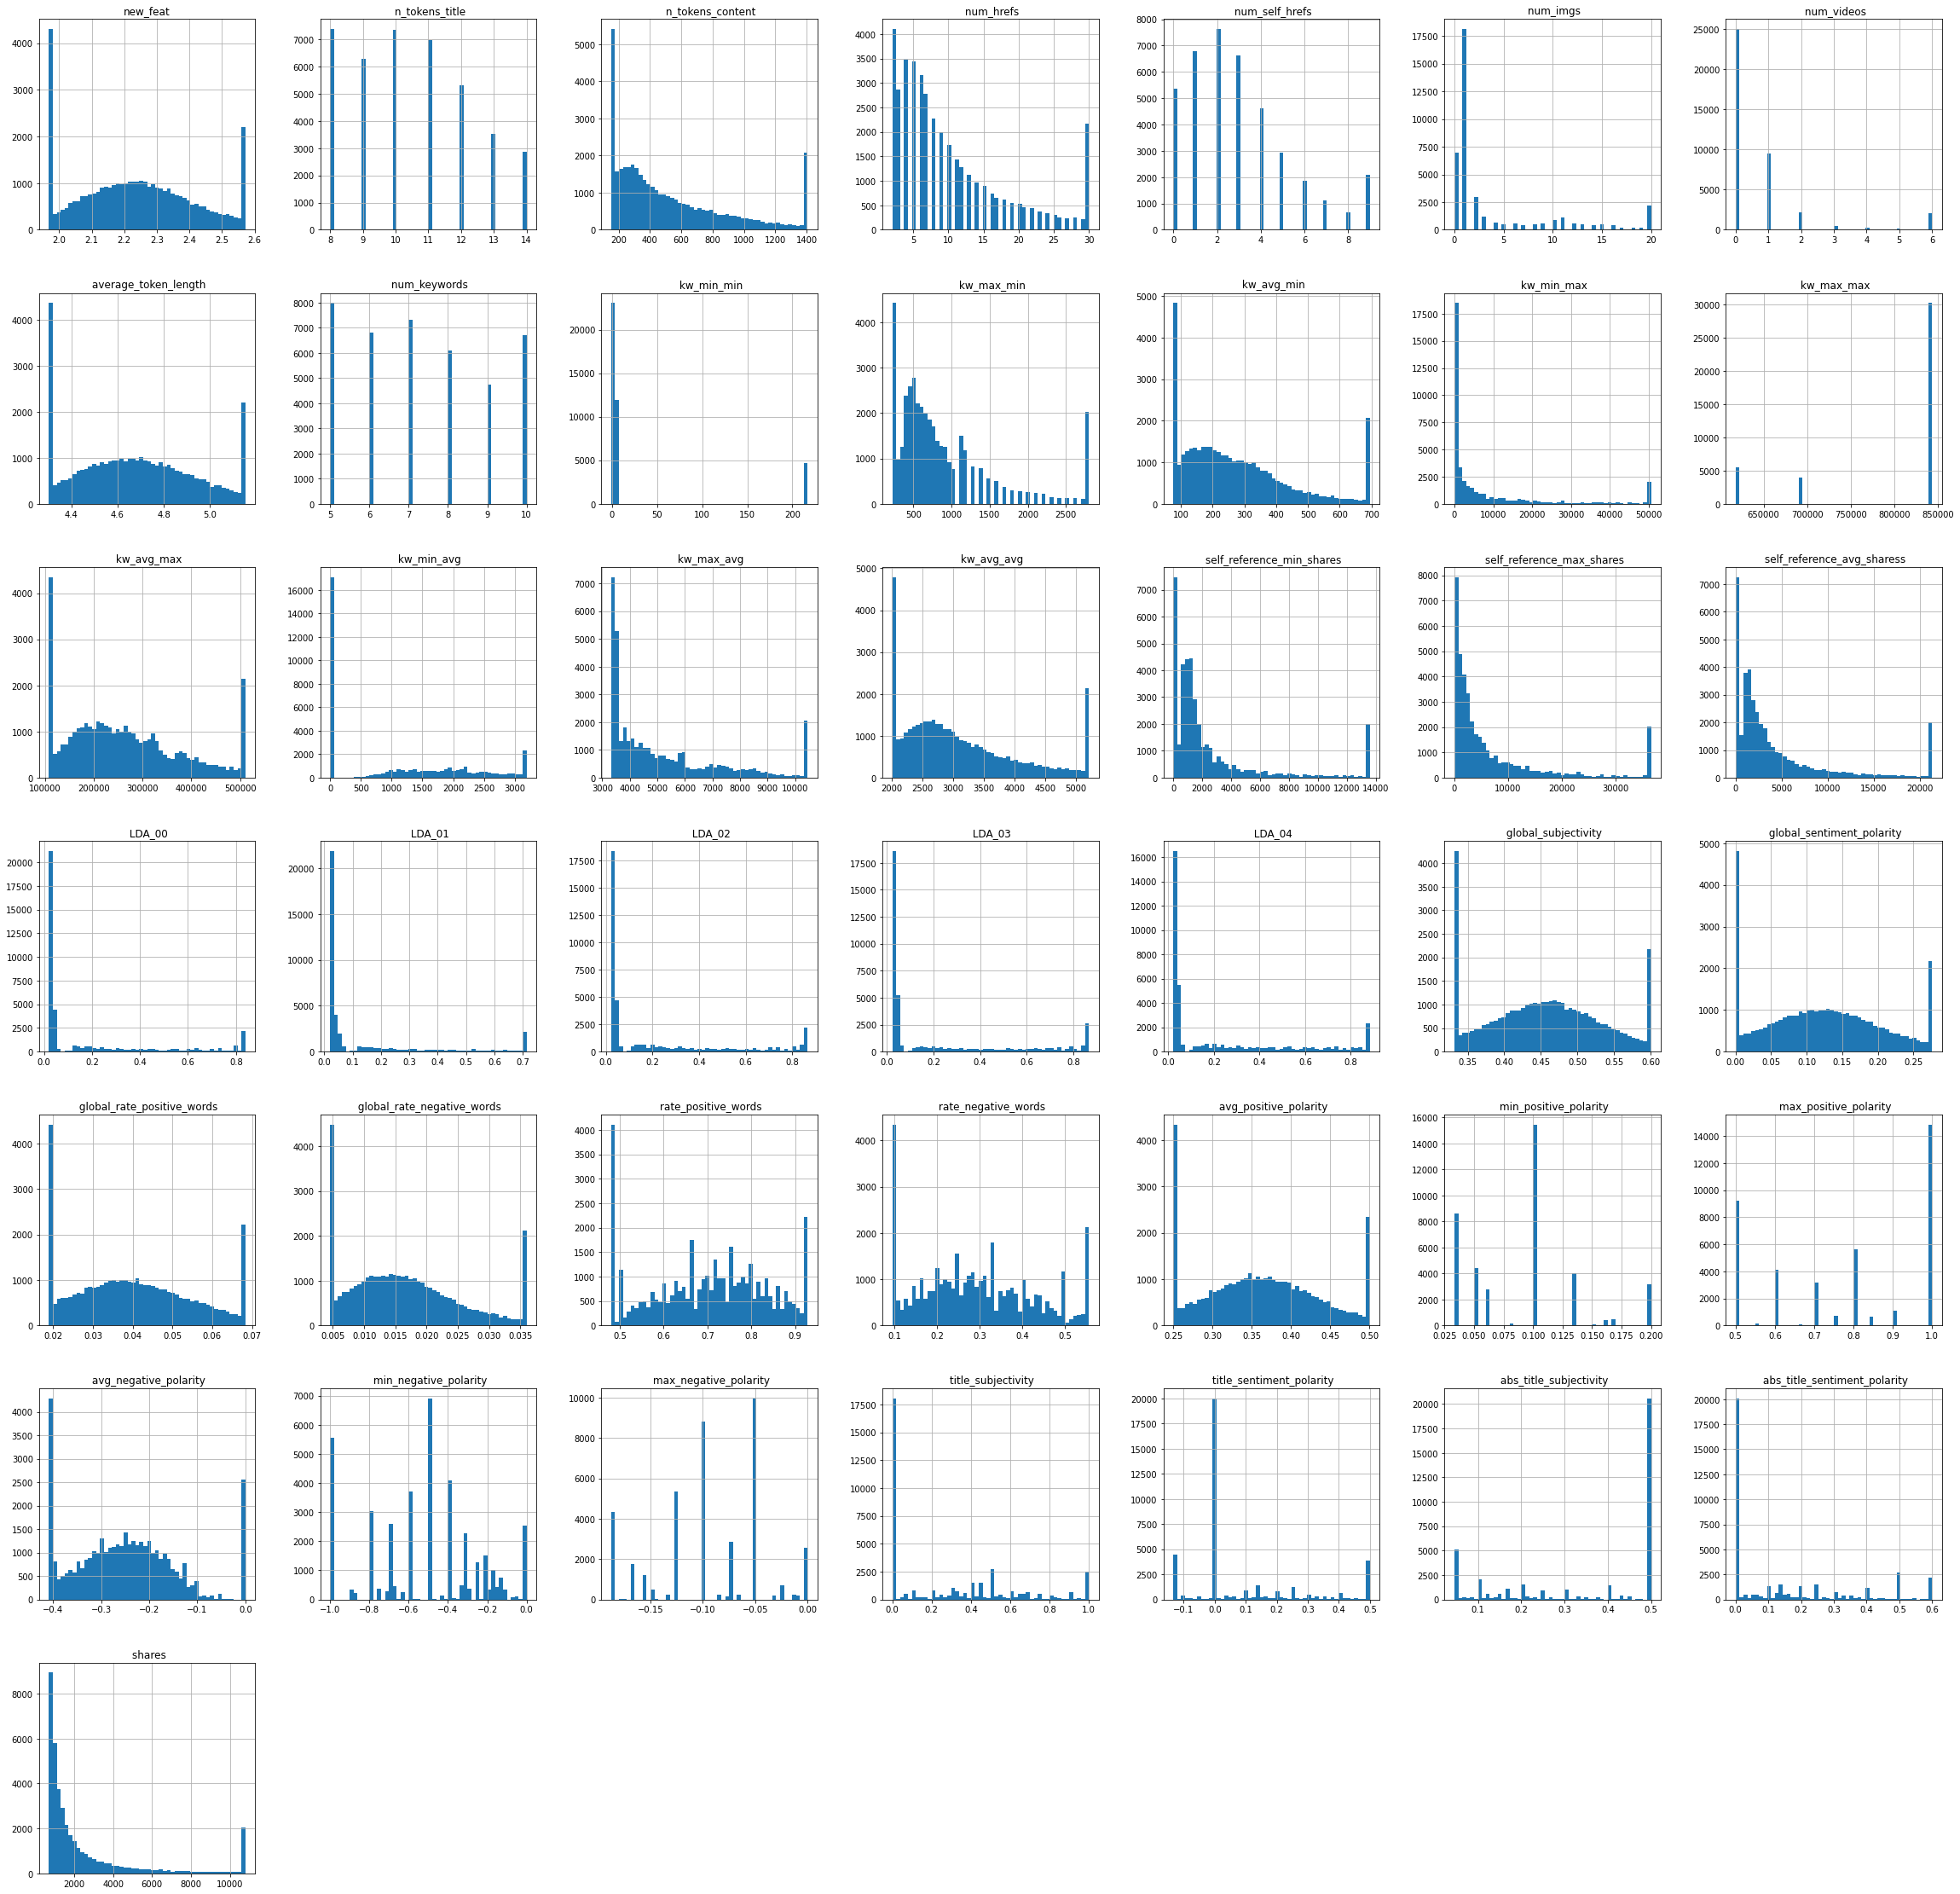

In [52]:
df2[num_col].hist(figsize=(40,40), xrot = 0, bins = 50)
plt.show()